# Python基础案例 | 小费数据集项目分析

可以用这个基础案例，练习一些可视化的内容。

#### 小费数据集项目分析目的：

- 小费金额与消费总额是否存在相关性?
- 性别、是否吸烟、星期几、中/晚餐、聚餐人数和小费金额是否有一定的关联？
- 小费金额占消费总金额的百分比是否服从正态分布？

In [2]:
# 导入包
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 拿到小费数据集
tips = sns.load_dataset('tips')

# 数据介绍： total_bill列为消费总金额；tip列为小费金额；sex列为顾客性别；smoker列为顾客是否抽烟；day列为消费的星期；time列为聚餐的时间段；size列为聚餐人数

# 查看前5行数据
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# 开始检查数据，数据量、数据缺失、数据是否异常等
tips.shape

(244, 7)

In [9]:
# 数值型数据描述性查看
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
# 查看数据类型正常，并且没有缺失值
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


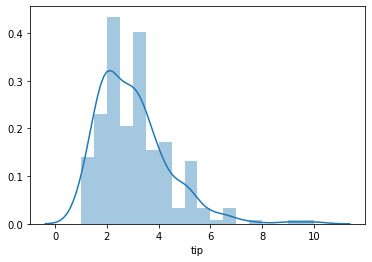

In [4]:
# 查看单个变量tip的分布情况，使用直方图
sns.distplot(tips['tip'])

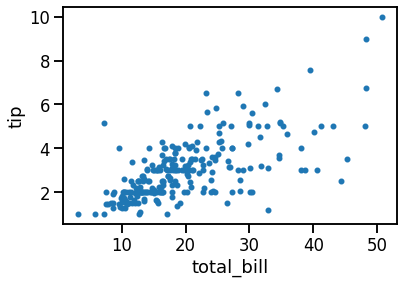

In [11]:
# 散点图查看小费和消费金额是否有相关性。图示表明，存在正线性相关。小费金额越高，小费越高
tips.plot(kind='scatter', x='total_bill', y='tip')

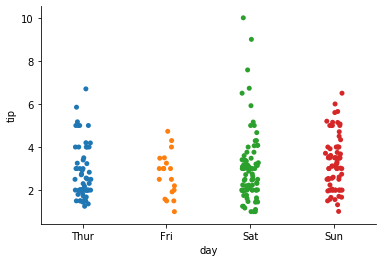

In [11]:
# 分类散点图，用于观察不同分类下，值的数量和高低分布
sns.stripplot(x='day',y='tip',data=tips)
sns.despine()

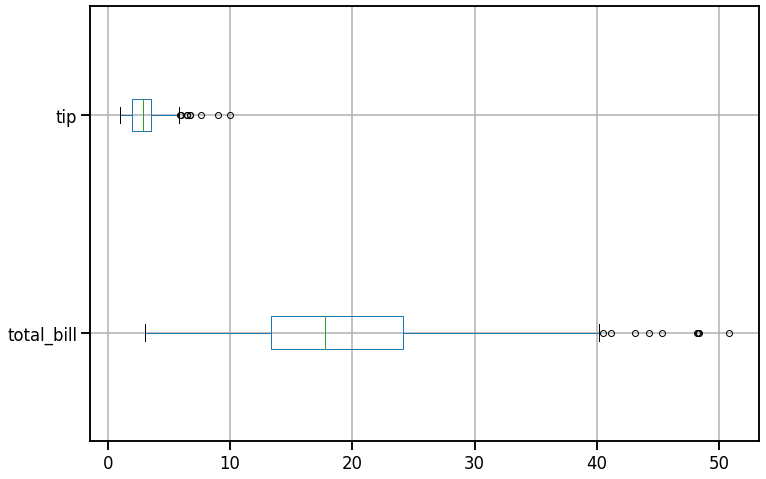

In [17]:
# 查看总金额和小费整体数据情况，图中总体金额呈现右偏，并且有部分异常值；小费呈现左偏

# figure() 设置图形大小
plt.figure(figsize=(12,8))
tips.boxplot(column=['total_bill','tip'],vert=False)


In [13]:
# 关注性别是否影响小费金额，这里使用男女总体平均值作为对比
male_tip = tips[tips['sex'] == ['Male']]['tip'].mean()
male_tip

3.0896178343949043

In [14]:
female_tip = tips[tips['sex'] == ['Female']]['tip'].mean()
female_tip

2.8334482758620685

In [15]:
s = Series(
    [male_tip, female_tip],
    index=['male','female']
)
s

male      3.089618
female    2.833448
dtype: float64

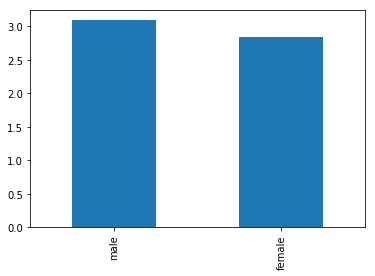

In [11]:
# 使用柱状图查看男女分类对别
s.plot(kind='bar')

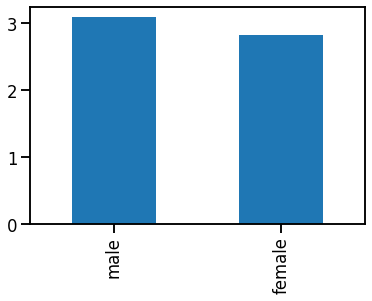

In [16]:
# Seaborn预设了四种比例，根据大小依次为 paper notebook talk poster 默认是 notebook，也就是上述的样式
sns.set_context('talk')
s.plot(kind='bar')

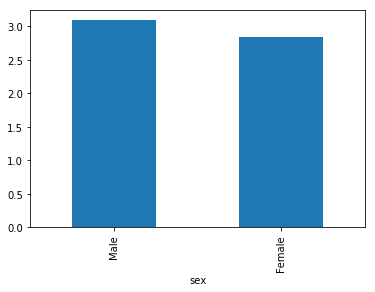

In [12]:
# 上述算平均值较为繁琐，这里可以使用groupby，比较快捷
sex_group = tips.groupby('sex')['tip'].mean()
sex_group.plot(kind='bar')

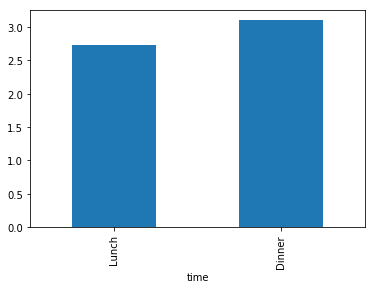

In [13]:
# 使用同样方式查看每一天什么时刻小费较高 
time_tip = tips.groupby('time')['tip'].mean()
time_tip.plot(kind='bar')


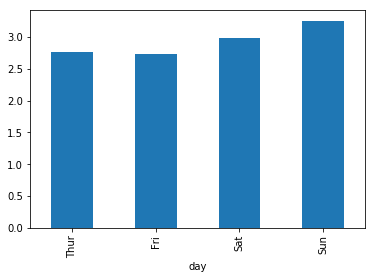

In [14]:
# 使用同样方式查看每周哪一天小费较高
day_tip = tips.groupby('day')['tip'].mean()
day_tip.plot(kind='bar')

In [9]:
# 查看小费占总金额的分布情况
tips['percent_tip'] = tips['tip']/(tips['tip'] + tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014


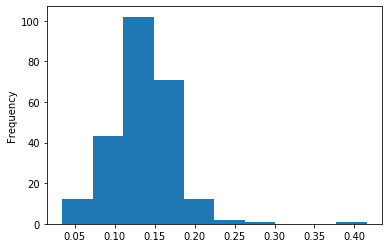

In [10]:
# 使用直方图查看小费占比分布，从图中可以看出，小费占比分布基本符合正态分布，有个别异常点，以及左偏
tips['percent_tip'].plot(kind='hist')